In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [9]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train.shape



(50000, 32, 32, 3)

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [11]:
model = models.Sequential([
    data_augmentation,

    layers.Conv2D(64, (3,3), padding="same", activation="relu",
                  input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [14]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 96s 238ms/step - accuracy: 0.3900 - loss: 1.7629 - val_accuracy: 0.2999 - val_loss: 2.0713
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 286ms/step - accuracy: 0.5018 - loss: 1.3865 - val_accuracy: 0.5563 - val_loss: 1.2150
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 263ms/step - accuracy: 0.5593 - loss: 1.2424 - val_accuracy: 0.5676 - val_loss: 1.2443
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 259ms/step - accuracy: 0.5973 - loss: 1.1461 - val_accuracy: 0.6179 - val_loss: 1.1415
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 244ms/step - accuracy: 0.6287 - loss: 1.0667 - val_accuracy: 0.6456 - val_loss: 1.0212
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 240ms/step - accuracy: 0.6509 - loss: 1.0068 - val_accuracy: 0.5315 - val_loss: 1.5793
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 215ms/step - accuracy: 0.6712 - loss: 0.9534 - val_accuracy: 0.6863 - val_loss: 0.9164
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 225ms/step - accuracy: 0.6861 - loss

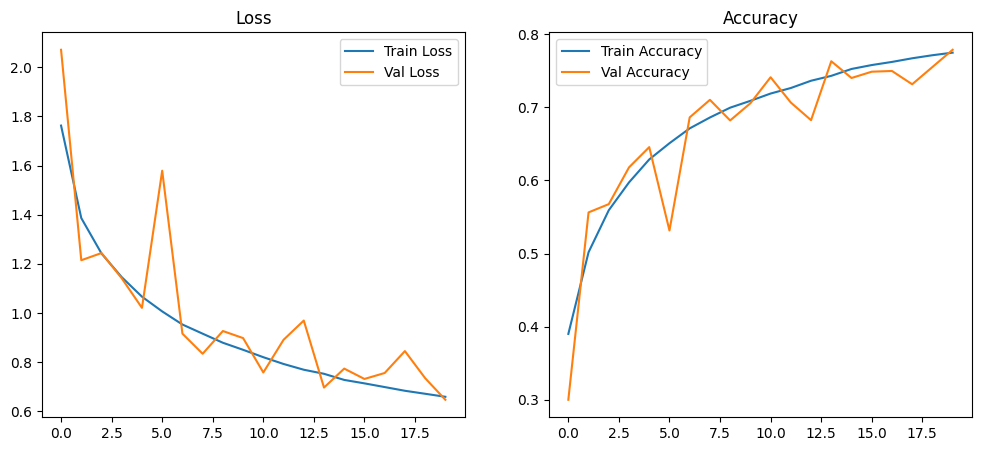

In [15]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")


plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")


plt.show()